In [27]:
import pandas as pd
import numpy as np
import os
from subprocess import check_output
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\sahil\ADANIPORTS.csv')

In [8]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [7]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [6]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

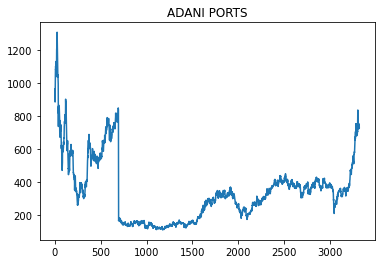

In [10]:
df['Close'].plot()
plt.title('ADANI PORTS')
plt.show()

Text(0.5, 1.0, 'ADANI PORTS cumulative Returns')

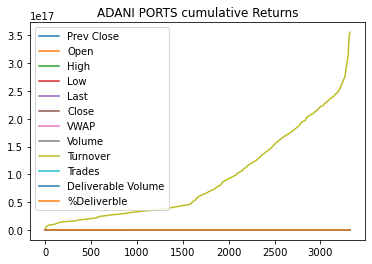

In [11]:
dr= df.cumsum()
dr.plot()
plt.title('ADANI PORTS cumulative Returns')

Text(0.5, 1.0, 'Adani port autocorrelation plot')

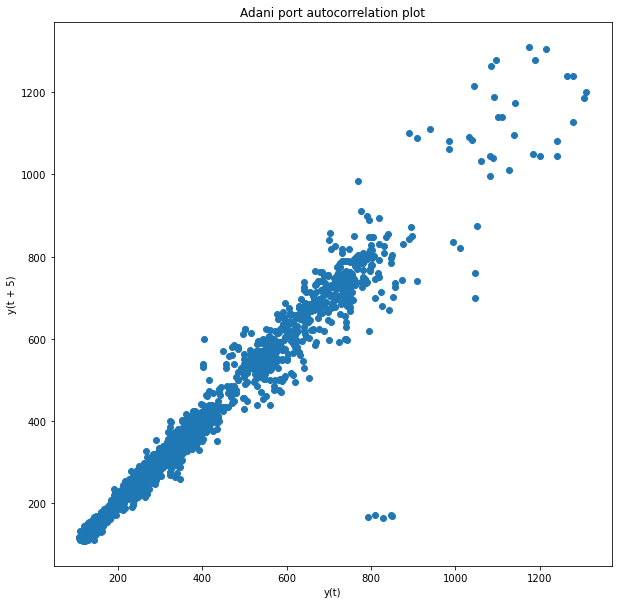

In [12]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'],lag=5)
plt.title('Adani port autocorrelation plot')

In [13]:
df['Date']

0       2007-11-27
1       2007-11-28
2       2007-11-29
3       2007-11-30
4       2007-12-03
           ...    
3317    2021-04-26
3318    2021-04-27
3319    2021-04-28
3320    2021-04-29
3321    2021-04-30
Name: Date, Length: 3322, dtype: object

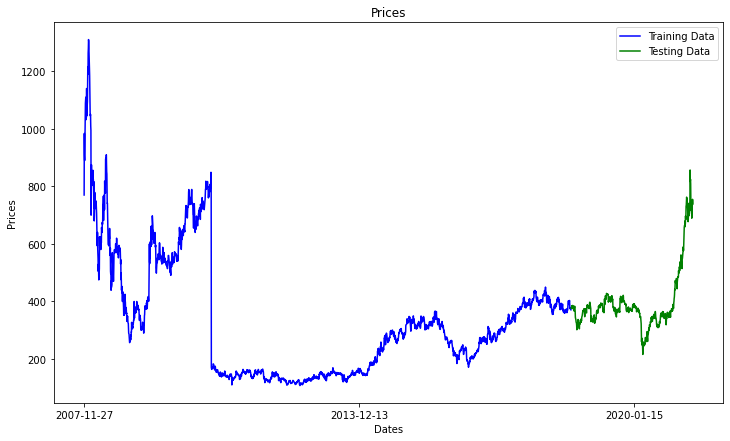

In [21]:
train_data,test_data=df[0:int(len(df)*0.8)],df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Open'],'blue',label='Training Data')
plt.plot(test_data['Open'],'green',label='Testing Data')
plt.xticks(np.arange(0,3322,1500),df['Date'][0:3322:1500])
plt.legend()

In [22]:
def smape_kun(y_true,y_pred):
    return np.mean(np.abs(y_pred-y_true)*200/(np.abs(y_pred)+np.abs(y_true)))

In [23]:
#evaluate an arima model for given order (p,d,q)
def evaluate_arima_model(X,arima_order):
    train_size=int(len(X)*0.66)
    train,test=X[0:train_size],X[train_size:]
    history=[x for x in train]
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model_fit()
        yhat=model_fit.forecast()[0]
        predictions.append(test[t])
        error=mean_squared_error(test,predictions)
        return error

In [30]:
train_ar=train_data['Open'].values
test_ar=test_data['Open'].values
history=[x for x in train_ar]
print(type(history))
predictions=list()
for t in range(len(test_ar)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test_ar[t]
    history.append(obs)
error=mean_squared_error(test_ar,predictions)
print('Testing mean squared error %.3f'%error)
error2=smape_kun(test_ar,predictions)
print('Symmetric mean absolute percentage error : %.3f'%error2)

<class 'list'>
Testing mean squared error 118.230
Symmetric mean absolute percentage error : 21.968


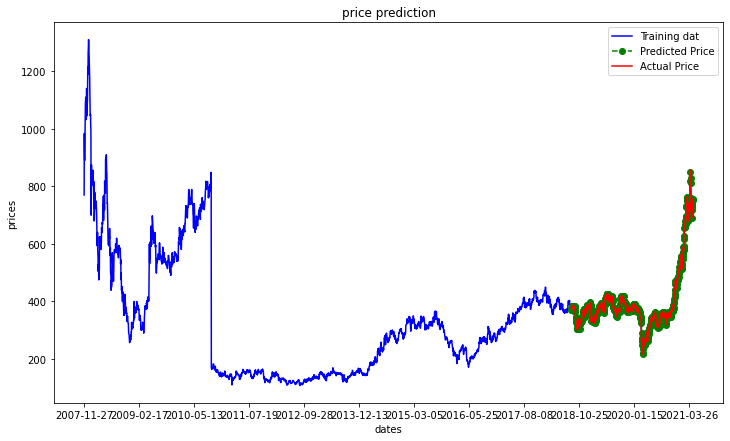

In [34]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'],'green',color='blue',label='Training dat')
plt.plot(test_data.index,predictions,color='green',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index,test_data['Open'],color='red',label='Actual Price')
plt.title('price prediction')
plt.xlabel('dates')
plt.ylabel('prices')
plt.xticks(np.arange(0,3322,300),df['Date'][0:3322:300])
plt.legend()

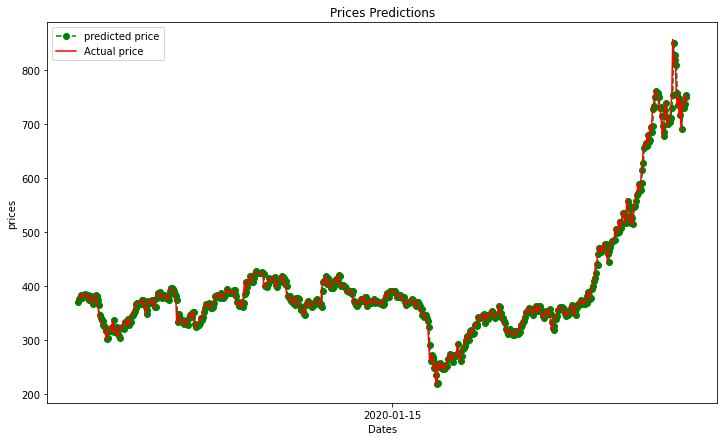

In [36]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index,predictions,color='green',marker='o',linestyle='dashed',label='predicted price')
plt.plot(test_data.index,test_data['Open'],color='red',label='Actual price')
plt.xticks(np.arange(3000,3322,1000),df['Date'][3000:3322:1000])
plt.title('Prices Predictions')
plt.xlabel('Dates')
plt.ylabel('prices')
plt.legend()